#  Logistic Regression ##

- A statistical method used to analyze a datset with one or more independent variable to determine the outcome.

- outcome is measured with a binary variable
    
    - There can be only 2 outcomes

    - Similar to linear regression but the dependent variable is measured with a binary variable

    - Its widely used in linear regression

**It should NOT be used if features and variables aren't equal.**    

# 1.Importing libraries #

1. Numpy

2. Seaborn

3. Matplotlib

4. Seaborn

5. Warnings

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [302]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Understanding #

**Below is a breakdown of the columns**

1. survived: This column indicates whether a passenger survived the Titanic disaster (0 = No, 1 = Yes).

2. pclass: Represents the passenger's ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class). This reflects socioeconomic status.

3. sex: The passenger's gender (male, female).

4. age: The passenger's age in years. Note that there might be missing values in this column.

5. sibsp: The number of siblings or spouses traveling with the passenger.

6. parch: The number of parents or children traveling with the passenger.

7. fare: The price the passenger paid for their ticket.

8. embarked: The port where the passenger embarked on the ship (C = Cherbourg, Q = Queenstown, S = Southampton).

9. class: Likely a derived column, possibly simplifying 'pclass' into broader categories.

10. who: This might denote a combination of 'sex' and 'age' to categorize passengers (e.g., 'child', 'man', 'woman').

11. adult_male: A Boolean column indicating whether the passenger is an adult male (True or False).

12. deck: The deck level on which the passenger's cabin was located. This might have missing values.

13. embark_town: The town where the passenger embarked (Cherbourg, Queenstown, Southampton).

14. alive: Likely a derived column similar to 'survived', simply using a different label.

15. alone: A Boolean column indicating whether the passenger was traveling alone (True or False).

# Exploratory Data Analysis #

1. Find the variables that are not nessecary.

2. Drop any unnessecary columns with missing values

3. Fill any missing values where appropriate.

## Dropping similar columns #

- the following are redunatant columns:
    1. embarked is the same as embark_town but its in initals e.g Southampton is S

    2. class is the same as pclass but its in initals e.g 1st class but its in 1

    3. alive is the same as survived but its not in boolean.

In [303]:
data.drop(['embarked','class','alive'],axis=1,inplace=True)

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


# Dealing with Missing Values #

In [304]:
#create a function

null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)


null_num


[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [305]:
# Visualize the output
null = pd.DataFrame(null_num,index=data.columns,columns=['Total Missing Values'])
null

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


#  Before dropping variables #

We need to visualize the missing values by using a countplot.

<Axes: xlabel='deck', ylabel='count'>

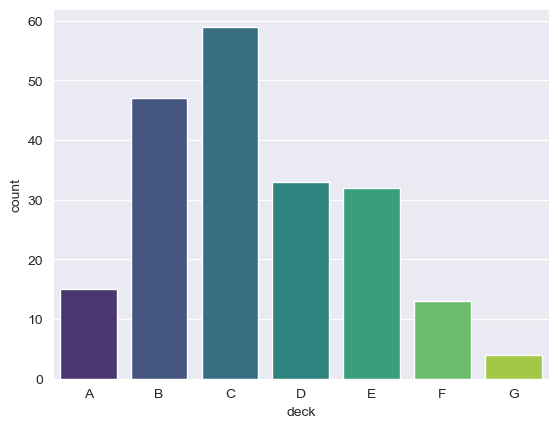

In [306]:
sns.set_style('darkgrid')
sns.countplot(x='deck', data=data,palette='viridis')

**Compare some more variables**

Analyze more variables using the hue feature 


In [307]:
#sns.set_style('darkgrid')
#sns.countplot(x="deck", hue="survived", data=data, palette="viridis")

# Removing the  graph error #

Changing the Survived column to string will remove the error.

<Axes: xlabel='deck', ylabel='count'>

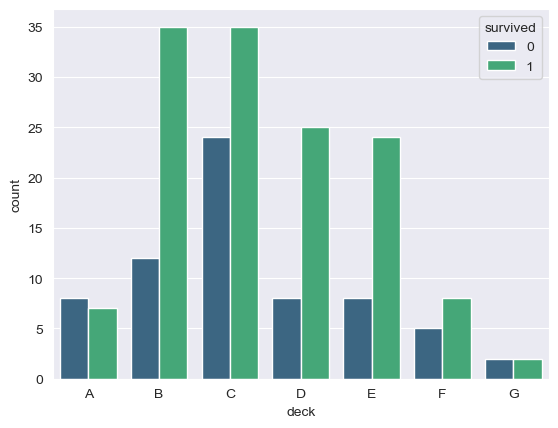

In [308]:
# Convert the 'survived' column to a string column
data['survived'] = data['survived'].astype(str)
# Now you can use the 'survived' column as the hue parameter
sns.countplot(x="deck", hue="survived", data=data, palette="viridis")


In [309]:
# Drop the Deck variable
data.drop(['deck'],axis=1,inplace=True) 


<Axes: xlabel='pclass', ylabel='age'>

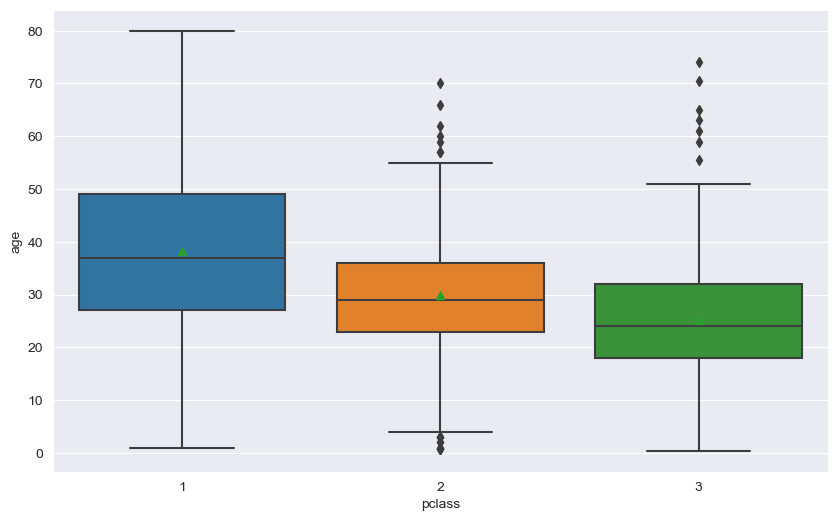

In [310]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass',y='age',data=data,showmeans=True)

## Fill in the missing values using the means of the pclass ##

In [311]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]

    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age


In [312]:
#Apply the changes

data.age = data[['age','pclass']].apply(fillna_age,axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


# Check if the changes took effect #

In [313]:
# Copy and paste the null values loop
null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

# Visualize the output
null = pd.DataFrame(null_num,index=data.columns,columns=['Total Missing Values'])
null


,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


**It worked, now drop the reminder null values**

In [314]:
data.dropna(inplace=True)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


# Visualize the variables #

- Inorder to understand the dataset we need to understand the impact of the event on the passenger.

    - Understand which type of passengers passed away.

    - Factors that contributed to passenger survival rate. 

<Axes: xlabel='survived', ylabel='count'>

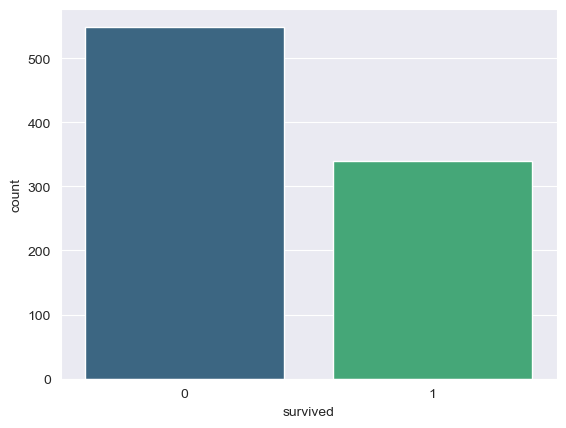

In [315]:
sns.set_style('darkgrid')

sns.countplot(x='survived',data= data,palette='viridis')

<Axes: xlabel='survived', ylabel='count'>

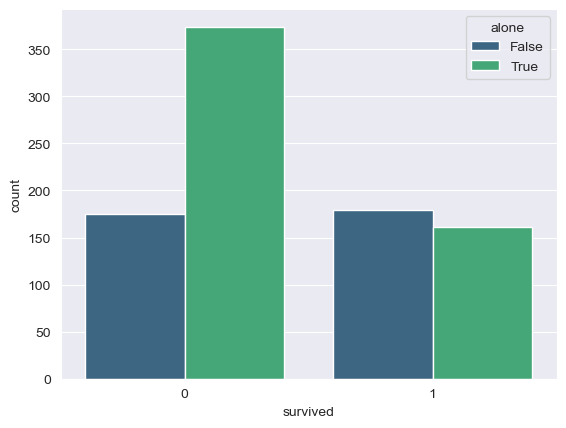

In [316]:
# Convert the 'survived' column to a string column
data['alone'] = data['alone'].astype(str)
# Now you can use the 'survived' column as the hue parameter
sns.set_style('darkgrid')
sns.countplot(x='survived',hue='alone',data=data,palette='viridis')

<Axes: xlabel='survived', ylabel='count'>

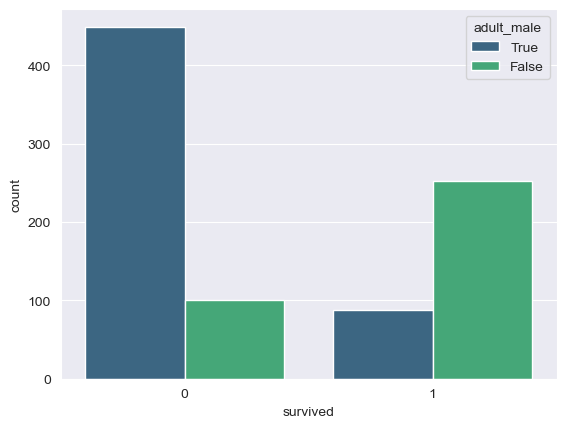

In [317]:
data['adult_male'] = data['adult_male'].astype(str)
sns.set_style('darkgrid')
sns.countplot(x='survived',hue='adult_male',data=data,palette='viridis')

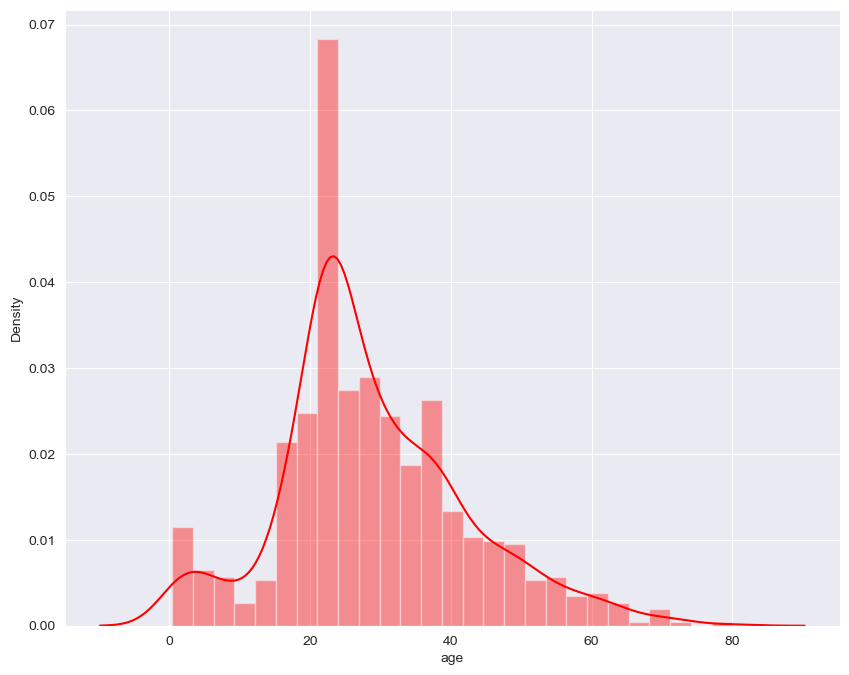

In [318]:
# Start with age variable
plt.figure(figsize=(10,8))
#Use the distplot graph
sns.distplot(data['age'],color='red')
plt.show()

<Axes: xlabel='fare', ylabel='Density'>

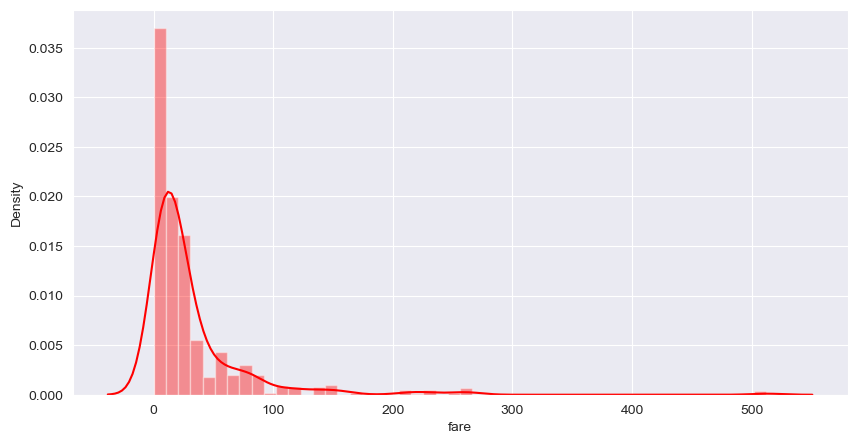

In [319]:
plt.figure(figsize=(10,5))
sns.distplot(data['fare'],color='red')


# Correlation Analysis

- Use a heatmap

In [320]:
numeric = data[['survived','pclass','age','sibsp','parch','fare']]

numeric

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,23.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


<Axes: >

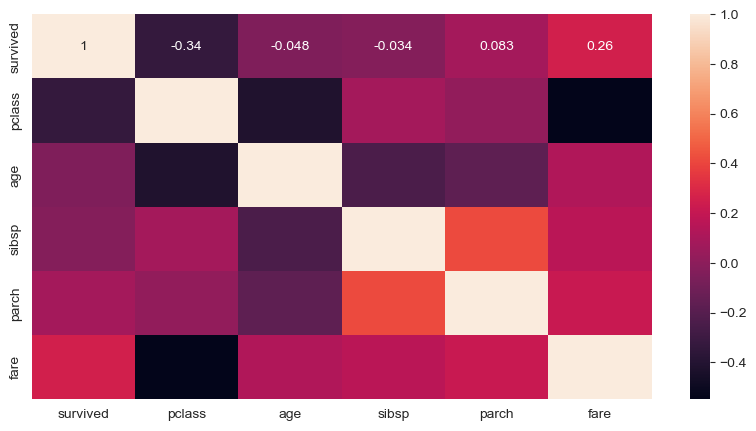

In [321]:
plt.figure(figsize=(10,5))

sns.heatmap(numeric.corr(),annot=True)

In [322]:
data.drop(['age','sibsp','parch'],axis=1,inplace=True)

data.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


# Encoding Categorical Variables 

- Transforming the categorical variables into binary values is imporant because it will allow the Logistic Regression Model to analyze the data.

- The data will be converted using One Hot Encoding Method

In [323]:
#Convert all categorical variables into binary.

sex = pd.get_dummies(data['sex'],drop_first=True)
who = pd.get_dummies(data['who'],drop_first=True)
adult_male = pd.get_dummies(data['adult_male'],drop_first=True)
embark_town = pd.get_dummies(data['embark_town'],drop_first=True)
alone = pd.get_dummies(data['alone'],drop_first=True)

In [324]:
data = pd.concat([data,sex,adult_male,embark_town,alone],axis=1)
data

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,True,True,False,True,False
1,1,1,female,71.2833,woman,False,Cherbourg,False,False,False,False,False,False
2,1,3,female,7.9250,woman,False,Southampton,True,False,False,False,True,True
3,1,1,female,53.1000,woman,False,Southampton,False,False,False,False,True,False
4,0,3,male,8.0500,man,True,Southampton,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,man,True,Southampton,True,True,True,False,True,True
887,1,1,female,30.0000,woman,False,Southampton,True,False,False,False,True,True
888,0,3,female,23.4500,woman,False,Southampton,False,False,False,False,True,False
889,1,1,male,30.0000,man,True,Cherbourg,True,True,True,False,False,True


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    object 
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   fare         889 non-null    float64
 4   who          889 non-null    object 
 5   adult_male   889 non-null    object 
 6   embark_town  889 non-null    object 
 7   alone        889 non-null    object 
 8   male         889 non-null    bool   
 9   True         889 non-null    bool   
 10  Queenstown   889 non-null    bool   
 11  Southampton  889 non-null    bool   
 12  True         889 non-null    bool   
dtypes: bool(5), float64(1), int64(1), object(6)
memory usage: 66.8+ KB


# Drop the original columns

In [326]:
#Dont not forget to put inplace= True
data.drop(["alone","sex","adult_male","embark_town",'who'],axis=1,inplace=True)

data.head()

,survived,pclass,fare,male,True,Queenstown,Southampton,True
0,0,3,7.2500,True,True,False,True,False
1,1,1,71.2833,False,False,False,False,False
2,1,3,7.9250,False,False,False,True,True
3,1,1,53.1000,False,False,False,True,False
4,0,3,8.0500,True,True,False,True,True


# Modelling # 

**Import the train_test_split libray from sklearn.model_selection**

In [327]:
from sklearn.model_selection import train_test_split

In [328]:
data.head()

,survived,pclass,fare,male,True,Queenstown,Southampton,True
0,0,3,7.2500,True,True,False,True,False
1,1,1,71.2833,False,False,False,False,False
2,1,3,7.9250,False,False,False,True,True
3,1,1,53.1000,False,False,False,True,False
4,0,3,8.0500,True,True,False,True,True


In [329]:
X = data.drop(['survived'],axis=1)
y = data["survived"]

In [330]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [331]:
X_train

,pclass,fare,male,True,Queenstown,Southampton,True
376,3,7.2500,False,False,False,True,True
458,2,10.5000,False,False,False,True,True
732,2,0.0000,True,True,False,True,True
507,1,26.5500,True,True,False,True,True
830,3,14.4542,False,False,False,False,False
...,...,...,...,...,...,...,...
107,3,7.7750,True,True,False,True,True
271,3,0.0000,True,True,False,True,True
862,1,25.9292,False,False,False,True,True
436,3,34.3750,False,False,False,True,False


# Import the Logistic Regression Model #

In [332]:
from sklearn.linear_model import LogisticRegression


In [333]:
lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [334]:
data.columns.astype('string')

Index(['survived', 'pclass', 'fare', 'male', 'True', 'Queenstown',
       'Southampton', 'True'],
      dtype='string')

In [335]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [340]:
y_prediction = lr_model.predict(X_test)

# Metrics Report

- Using the Classification Report Module from sklearn.metrics visulalize the models performance

- Using the Confusion Matrix to evaluate the models performance

In [341]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [342]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



# Confusion Matrix 

In [344]:
cnf_matrix = confusion_matrix(y_test,y_prediction)
cnf_matrix

array([[111,  30],
       [ 17,  65]], dtype=int64)

# Analysis of the Confusion matrix

- The value 111 in the top left side of the array represents the False Negative

- The value 17 in the botttom left side of the array represents the True Negative

- The values 30 in the top right side of the array represents the False Positive

- The value 65 in the bottom right side of the array represents the True Positive